In [15]:
%run Data_new.ipynb
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf

oryginal_isotherms: 910
oryginal_bet: 910
oryginal_info: 910 



In [16]:
size = 40
X,y,info,oryginal = get_data(size,flat=True);
for e in X[0]:
    print(e)
y_all_nested = []
for i in range(len(y)):
    y_all_nested.append([y[i],info[i]])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train_nested, y_test_nested, = train_test_split(X, y_all_nested, test_size=0.01, random_state=42) #random_state=42
y_train = [item[0] for item in y_train_nested]
y_train = np.array(y_train).astype(float)
y_test = [item[0] for item in y_test_nested]
y_test = np.array(y_test).astype(float)
# print(y_train)
# X_train = X_train.reshape(X_train.shape[0], -1)
# print(X[0])
#for n in X[0]:
#    print(n)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# print(X_train[0])
print(len(X_train))
print(len(X_test))

flat=True, returned one dimension data= [x,y,x,y,x,y,...]
X (910, 80)
y (910,)
info 910
oryginal_isotherms 910
return: X, y, info, oryginal_isotherms
0.01
0.01
0.029630618413506865
50.97234837124802
0.04645347084956167
56.700002016437566
0.07370479374309305
58.18494925778282
0.10096096821627418
62.51437764786942
0.12879084198305688
63.289538786433695
0.15430651225683364
66.90384433612326
0.1809792842771136
69.0985776802504
0.2053317883298251
70.57685399957722
0.23258068543353141
70.63956066655214
0.2569319765913304
71.4067166986938
0.28244643397019464
74.30990196119865
0.3062216000445672
77.20908467049253
0.3323109696119456
77.26912296865999
0.3566634736646572
78.74739928798681
0.3827564819167728
80.94079844771
0.40942440235740274
80.29105064309601
0.433776906410114
81.76932696242284
0.45986991466223015
83.96272612214625
0.48479975669328057
84.02009605150647
0.5085737098727406
86.2081584736145
0.5335059776936159
87.68776897734529
0.5590167963877429
88.4575933782944
0.5839478513137059
8

In [17]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(gpus))
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

Num GPUs Available:  1


In [18]:
epochs_number = 1000



model = tf.keras.Sequential([
    # tf.keras.layers.Flatten(input_shape=(size)),  
    tf.keras.layers.Dense(size, activation='relu'), 
    tf.keras.layers.Dense(15, activation='relu'), 
    tf.keras.layers.Dense(10, activation='relu'), 
    tf.keras.layers.Dense(3, activation='relu'), 
    tf.keras.layers.Dense(1)                      
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

metrics=['mae', 'mse']
model.compile(optimizer=optimizer, loss='mae', metrics=metrics)
# model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# history  =  model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=2)
history  =  model.fit(X_train, y_train, epochs=epochs_number, batch_size=100,validation_split=0.1, verbose=2)
results = model.evaluate(X_test, y_test, verbose=0)
print("Metrics:",results)
for index, metric in enumerate(metrics):
    print(f"{metric} = {results[index+1]}")


Epoch 1/1000
9/9 - 2s - 247ms/step - loss: 1051.1489 - mae: 1051.1489 - mse: 1568372.1250 - val_loss: 1044.2125 - val_mae: 1044.2125 - val_mse: 1492698.0000
Epoch 2/1000
9/9 - 0s - 8ms/step - loss: 1050.9495 - mae: 1050.9495 - mse: 1567889.5000 - val_loss: 1044.0802 - val_mae: 1044.0802 - val_mse: 1492310.3750
Epoch 3/1000
9/9 - 0s - 9ms/step - loss: 1050.7938 - mae: 1050.7938 - mse: 1567378.3750 - val_loss: 1043.8922 - val_mae: 1043.8922 - val_mse: 1491734.0000
Epoch 4/1000
9/9 - 0s - 9ms/step - loss: 1050.5483 - mae: 1050.5483 - mse: 1566598.6250 - val_loss: 1043.5721 - val_mae: 1043.5721 - val_mse: 1490829.2500
Epoch 5/1000
9/9 - 0s - 8ms/step - loss: 1050.1122 - mae: 1050.1122 - mse: 1565403.5000 - val_loss: 1042.9783 - val_mae: 1042.9783 - val_mse: 1489367.8750
Epoch 6/1000
9/9 - 0s - 8ms/step - loss: 1049.3094 - mae: 1049.3094 - mse: 1563440.2500 - val_loss: 1042.0408 - val_mae: 1042.0408 - val_mse: 1487130.5000
Epoch 7/1000
9/9 - 0s - 8ms/step - loss: 1048.0854 - mae: 1048.0854 

In [19]:
results = model.evaluate(X_test, y_test, verbose=0)
print("Metrics:",results)
for index, metric in enumerate(metrics):
    print(f"{metric} = {results[index+1]}")

Metrics: [102.04367065429688, 102.04367065429688, 25002.177734375]
mae = 102.04367065429688
mse = 25002.177734375


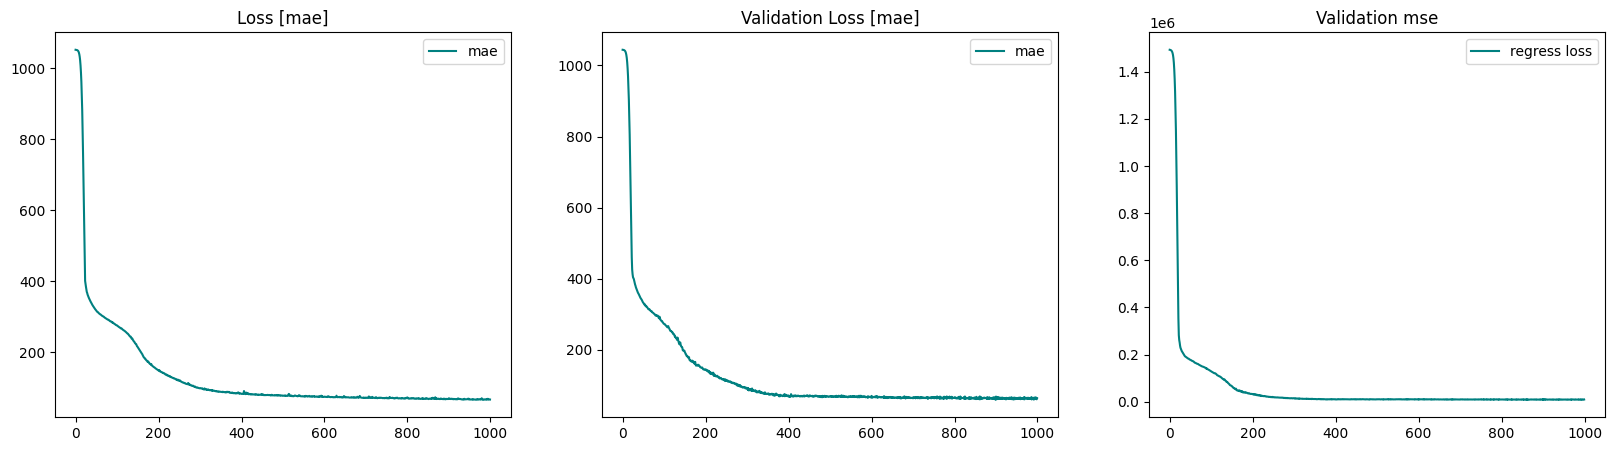

In [20]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(history.history['loss'], color='teal', label='mae')
# ax[0].plot(history.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss [mae]')
ax[0].legend()

ax[1].plot(history.history['val_loss'], color='teal', label='mae')
# ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Validation Loss [mae]')
ax[1].legend()

ax[2].plot(history.history['val_mse'], color='teal', label='regress loss')
# ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Validation mse')
ax[2].legend()

plt.show()

In [21]:
error_threshold = 50
max_error_threshold = 30
predictions = model.predict(X_test, verbose=0)
list_below =[]
list_above=[]
errors = []
for i in range(len(predictions)):
    errors.append(abs(predictions[i] - y_test[i]))
    # print(f"{i} {predictions[i]}  ------   {y_valid[i]}           blad: {abs(predictions[i] - y_valid[i])}")
    if(abs(predictions[i] - y_test[i]) > max_error_threshold):
        print(f" przewidywana --> {predictions[i]}     {y_test[i]} <-- rzeczyswista     blad: {abs(predictions[i] - y_test[i])}  {y_test_nested[i][1]}")
        
    if(error_threshold<=abs(predictions[i] - y_test[i])):
        list_above.append(i)
    else: list_below.append(i)

print(f"max error: {max(errors)}  dla {y_test_nested[errors.index(max(errors))][1]} " )
print(f"for error thteshold[{error_threshold}] - {round((len(list_below)/len(predictions))*100,2)}%     {len(list_below)} izotermy na {len(predictions)}")

 przewidywana --> [1165.956]     1111.0 <-- rzeczyswista     blad: [54.95605469]  ['Data74', 'ACK-3-7', '3_2']
 przewidywana --> [963.15924]     1041.9 <-- rzeczyswista     blad: [78.74075928]  ['Data58', '850-45m', '5_4']
 przewidywana --> [1007.12726]     1218.62 <-- rzeczyswista     blad: [211.4927417]  ['Data134', 'AC_15-400-1', '1']
 przewidywana --> [833.14026]     753.0 <-- rzeczyswista     blad: [80.14025879]  ['Data140', 'C400-90', '2_2']
 przewidywana --> [1199.4926]     1139.0 <-- rzeczyswista     blad: [60.49255371]  ['Data147', 'MCS900-15', '4_3']
 przewidywana --> [1037.1458]     1462.0 <-- rzeczyswista     blad: [424.85424805]  ['Data47', 'ACF30M', '1']
 przewidywana --> [1006.1834]     1075.22 <-- rzeczyswista     blad: [69.03658936]  ['Data134', 'AC_0-400-1', '1']
max error: [424.85424805]  dla ['Data47', 'ACF30M', '1'] 
for error thteshold[50] - 30.0%     3 izotermy na 10


In [58]:
# model.save("model_1000.keras")

In [8]:
from tensorflow.keras.models import load_model
model_name = 'model_1000.keras'
modelos = load_model(model_name)
predictions = modelos.predict(X_test, verbose=0)

error_threshold = 50
max_error_threshold = 400
list_below =[]
list_above=[]
errors = []
for i in range(len(predictions)):
    errors.append(abs(predictions[i] - y_test[i]))
    # print(f"{i} {predictions[i]}  ------   {y_valid[i]}           blad: {abs(predictions[i] - y_valid[i])}")
    if(abs(predictions[i] - y_test[i]) > max_error_threshold):
        print(f" przewidywana --> {predictions[i]}     {y_test[i]} <-- rzeczyswista     blad: {abs(predictions[i] - y_test[i])}  {y_test_nested[i][1]}")
        
    if(error_threshold<=abs(predictions[i] - y_test[i])):
        list_above.append(i)
    else: list_below.append(i)

print(f"max error: {max(errors)}  dla {y_test_nested[errors.index(max(errors))][1]} " )
print(f"for error thteshold[{error_threshold}] - {round((len(list_below)/len(predictions))*100,2)}%     {len(list_below)} izotermy na {len(predictions)}")

ValueError: File not found: filepath=model_1000.keras. Please ensure the file is an accessible `.keras` zip file.

In [ ]:
#  przewidywana --> [553.189]     249.0 <-- rzeczyswista     blad: [304.18903]  ['Data125', 'coconut_shells_6h', '7']
#  przewidywana --> [1967.7969]     1616.22 <-- rzeczyswista     blad: [351.5769]  ['Data153', 'GC-C04', '4']
#  przewidywana --> [1556.715]     1193.2 <-- rzeczyswista     blad: [363.515]  ['Data54', 'CZ0.65', '3']
#  przewidywana --> [1296.133]     938.0 <-- rzeczyswista     blad: [358.13306]  ['Data15', '3', '1']
#  przewidywana --> [732.7655]     1188.0 <-- rzeczyswista     blad: [455.2345]  ['Data156', 'MCAC-2-1', '4']
#  przewidywana --> [573.38586]     976.0 <-- rzeczyswista     blad: [402.61414]  ['Data47', 'ACF30M-HNO3', '3']
#  przewidywana --> [350.85513]     823.0 <-- rzeczyswista     blad: [472.14487]  ['Data86', 'ACZ3', '2']
# max error: [472.14487]  dla ['Data86', 'ACZ3', '2'] 
# for error thteshold[50] - 57.8%     100 izotermy na 173